## Lesson #7: Intro to Classification - K-Nearest Neighbors 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, neighbors, metrics
from sklearn.model_selection import KFold, GridSearchCV

In [3]:
# Load iris dataset from the datasets package
iris = datasets.load_iris()

# Create a pandas dataframe from iris. Grab the column names 
# from iris.feature_names, and target from iris.target:
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

In [4]:
# Check the column names in your dataframe
irisdf.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

#### Plotting

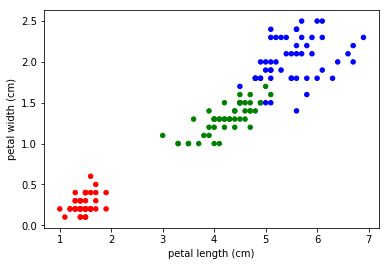

In [5]:
# Define the colormap dictionary (dictionaries are a great way of 
# replacing values in a Series with ".apply()")
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

# Plot the petal length against width using the target's label as the color to see patterns
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget);

In [ ]:
# Check the summary statistics
irisdf.describe()

### 2. Using those cutpoints create a function to classify the flowers

In [ ]:
def my_classifier(row):
  #fill in here




In [ ]:
# Apply your newly created function to the irisdf and assign it to a variable named predictions
predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

### Starter Code

Work on improving the classifier below.


In [ ]:
def my_classifier(row):




In [ ]:
predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

# check the accuracy
float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

## Using distance: KNN implementation
 

### Let's setup our data

In [ ]:
irisdf.head()

### Check out the flower types

In [ ]:
outcome = irisdf["target"]
outcome.value_counts()

In [ ]:
features = irisdf[["petal length (cm)", "petal width (cm)"]]
features.head()

### Start by selecting the options you would like for your model. 
Here we choose 3 neighbors, uniform weights and default settings

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')

### Next fit the model to our data 

In [ ]:
knn.fit(features, outcome)

In [ ]:
#this prints our predicted values
print(knn.predict(features))

In [ ]:
# print the real values (flower types)
# info on target: http://scikit-learn.org/stable/datasets/index.html
print(iris.target)

In [ ]:
# calculate accuracy (replace x and y with real data)
print(knn.score(x, y))

### Question: Do we see a change in performance when using the distance weight?

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='') # add in the weights parameter here

In [ ]:
knn.fit(features, outcome)
print(knn.predict(features))
print(iris.target)

print(knn.score(features, outcome))

### Solution to solving K (with cross-validation and grid-search)

n_neighbors is an option we set in KNN. We'll tune this value to attempt to improve our prediction.

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [ ]:
k = range(1, 100)
params = {'n_neighbors': k }
gs = GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params
    
)
gs.fit(iris.data, iris.target)
scores = gs.cv_results_.get('mean_test_score', None)

In [ ]:
# scores = pd.DataFrame(scores)

### Try plotting the score to find the elbow

In [ ]:
plt.plot(scores);

In [ ]:
plt.plot(scores[:25]);

### Which K would you chose and why?

Answer:

### Now try adding cross validation. 
1. Add K Folds (see starter code below and at the end of lab 6 solutions) 
2. Repeat KNN analysis. 
3. Compare your results 


### How does it compare to running in the full dataset? 

In [ ]:
kf = KFold(n_splits=5, random_state=1234, shuffle=False)
# for train, test in kf.split(irisdf):
#     print("%s %s" % (train, test))

In [ ]:
# Rerun KNN using KFolds

Answer: 